<a href="https://colab.research.google.com/github/Mangeshdeore/Drug-Data-Prediction/blob/main/Drugdata_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Understanding about the Dataset
Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.

It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe a drug to a new patient.

Dataset is received from Kaggle.com

## Decision Tree
In this project, I will apply a popular machine learning algorithm, Decision Tree. I will use this classification algorithm to build a model from the historical data of patients, and their response to different medications. Then I will use the trained decision tree to predict the class of an unknown petient, or to find a proper drug for a new patient.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline


In [ ]:
data= pd.read_csv('/content/drug200.csv')
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
data.shape

(200, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [ ]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
data.nunique()

Age             57
Sex              2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64

In [ ]:
data['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [ ]:
data['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [ ]:
data['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [ ]:
data['Drug'].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

## Data Preprocessing

In [ ]:
data=data.dropna(axis=0)

In [ ]:
data=pd.get_dummies(data)
data

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX,Drug_drugY
0,23,25.355,1,0,1,0,0,1,0,0,0,0,0,1
1,47,13.093,0,1,0,1,0,1,0,0,0,1,0,0
2,47,10.114,0,1,0,1,0,1,0,0,0,1,0,0
3,28,7.798,1,0,0,0,1,1,0,0,0,0,1,0
4,61,18.043,1,0,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,56,11.567,1,0,0,1,0,1,0,0,0,1,0,0
196,16,12.006,0,1,0,1,0,1,0,0,0,1,0,0
197,52,9.894,0,1,0,0,1,1,0,0,0,0,1,0
198,23,14.020,0,1,0,0,1,0,1,0,0,0,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 200 non-null    int64  
 1   Na_to_K             200 non-null    float64
 2   Sex_F               200 non-null    uint8  
 3   Sex_M               200 non-null    uint8  
 4   BP_HIGH             200 non-null    uint8  
 5   BP_LOW              200 non-null    uint8  
 6   BP_NORMAL           200 non-null    uint8  
 7   Cholesterol_HIGH    200 non-null    uint8  
 8   Cholesterol_NORMAL  200 non-null    uint8  
 9   Drug_drugA          200 non-null    uint8  
 10  Drug_drugB          200 non-null    uint8  
 11  Drug_drugC          200 non-null    uint8  
 12  Drug_drugX          200 non-null    uint8  
 13  Drug_drugY          200 non-null    uint8  
dtypes: float64(1), int64(1), uint8(12)
memory usage: 7.0 KB


In [ ]:
X=data.drop(['Drug_drugA','Drug_drugB', 'Drug_drugC', 'Drug_drugX', 'Drug_drugY' ], axis=1)


In [ ]:
y= data[['Drug_drugA','Drug_drugB', 'Drug_drugC', 'Drug_drugX', 'Drug_drugY']] 

In [ ]:
features=X.columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 200 non-null    int64  
 1   Na_to_K             200 non-null    float64
 2   Sex_F               200 non-null    uint8  
 3   Sex_M               200 non-null    uint8  
 4   BP_HIGH             200 non-null    uint8  
 5   BP_LOW              200 non-null    uint8  
 6   BP_NORMAL           200 non-null    uint8  
 7   Cholesterol_HIGH    200 non-null    uint8  
 8   Cholesterol_NORMAL  200 non-null    uint8  
 9   Drug_drugA          200 non-null    uint8  
 10  Drug_drugB          200 non-null    uint8  
 11  Drug_drugC          200 non-null    uint8  
 12  Drug_drugX          200 non-null    uint8  
 13  Drug_drugY          200 non-null    uint8  
dtypes: float64(1), int64(1), uint8(12)
memory usage: 7.0 KB


## Setting up Decision Tree

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.3, random_state=3)

In [ ]:
X_train.shape

(140, 9)

In [ ]:
X_test.shape

(60, 9)

In [ ]:
y_train.shape

(140, 5)

In [ ]:
y_test.shape

(60, 5)

In [ ]:
drugTree= DecisionTreeClassifier(criterion='entropy', max_depth= 4)
drugTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
base_pred= drugTree.predict(X_test)
pred_train= drugTree.predict(X_train)

## **Evaluation**

In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [ ]:
accuracy_score(y_train,pred_train)

1.0

In [ ]:
accuracy_score(y_test,base_pred)

0.9833333333333333

In [ ]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      0.95      0.98        21
           4       0.96      1.00      0.98        22

   micro avg       0.98      0.98      0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60
 samples avg       0.98      0.98      0.98        60



In [ ]:
drugTree.feature_importances_

array([0.12153781, 0.50667727, 0.        , 0.        , 0.20700191,
       0.09678277, 0.        , 0.06800024, 0.        ])

In [ ]:
pd.DataFrame(index= X.columns,data=drugTree.feature_importances_, columns=['feature Importance'])

,feature Importance
Age,0.121538
Na_to_K,0.506677
Sex_F,0.000000
Sex_M,0.000000
BP_HIGH,0.207002
BP_LOW,0.096783
BP_NORMAL,0.000000
Cholesterol_HIGH,0.068000
Cholesterol_NORMAL,0.000000


## **Visualize the Tree**

In [ ]:
from sklearn.tree import plot_tree

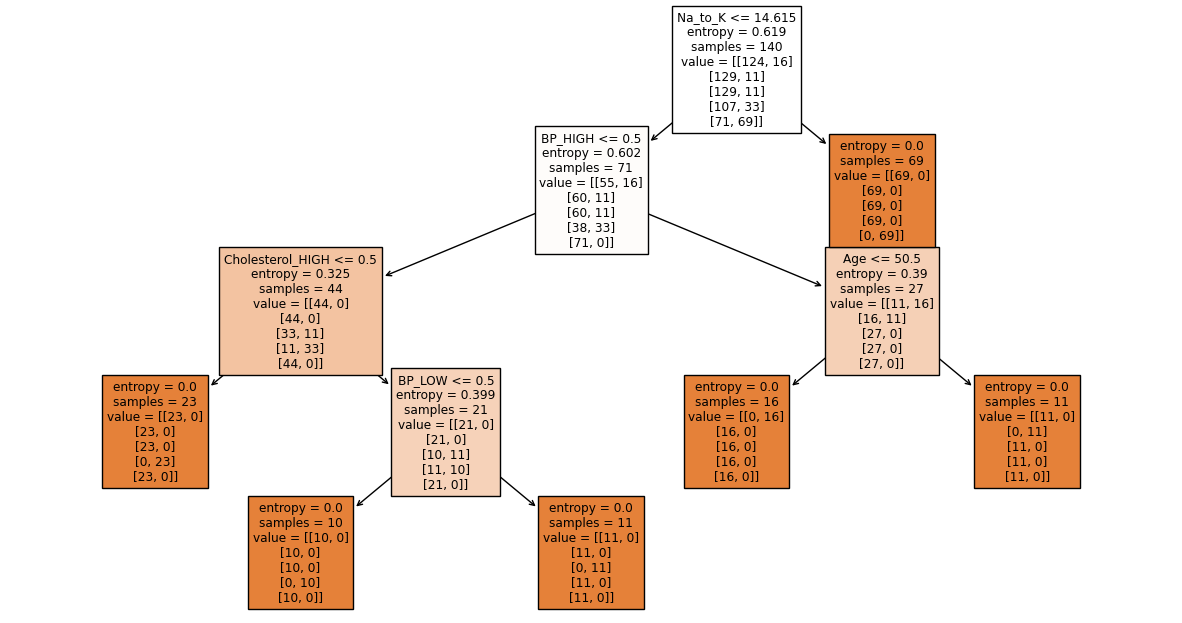

In [ ]:
plt.figure(figsize=(15,8), dpi=100)
plot_tree(drugTree,filled=True, feature_names=X.columns)
plt.show()